# Part II: Feature Engineering
Part I was tough wasn't it? Well done for surviving. 

Right now, we only have coordinates and time - not to mention our filesize is rather unwieldy. In this Part II, we will extract the most important pieces of information in the CSV we have and simplify the data that we'll be working with in subsequent Parts. 

In this notebook, you will do the following:
1. Load the CSV that you obtained from Part I (go back there and do it first if you haven't)
2. Convert the string representation of lists as actual lists
3. Divide the coordinates of taxis into different sectors
4. Engineer new features out of the time data
5. Drop unneeded columns
6. Export the engineered DataFrame

### Step 1: Import the following libraries
- pandas

In [1]:
# Step 1: Import pandas
import pandas as pd

### Step 2: Read the CSV from Part I
We'll now read the CSV that we got from Part I as a DataFrame.

In [2]:
# Step 2: Read the CSV
df = pd.read_csv('taxi_data_raw.csv')
df.columns, df

(Index(['type', 'geometry.type', 'geometry.coordinates', 'properties.timestamp',
        'properties.taxi_count', 'properties.api_info.status', 'time'],
       dtype='object'),
          type geometry.type  \
 0     Feature    MultiPoint   
 1     Feature    MultiPoint   
 2     Feature    MultiPoint   
 3     Feature    MultiPoint   
 4     Feature    MultiPoint   
 ...       ...           ...   
 8636  Feature    MultiPoint   
 8637  Feature    MultiPoint   
 8638  Feature    MultiPoint   
 8639  Feature    MultiPoint   
 8640  Feature    MultiPoint   
 
                                    geometry.coordinates  \
 0     [[103.6267, 1.307992], [103.63226, 1.30884], [...   
 1     [[103.63213, 1.31121], [103.63766, 1.30045], [...   
 2     [[103.63145, 1.31125], [103.6376, 1.300248], [...   
 3     [[103.63132, 1.3216], [103.63314, 1.32474], [1...   
 4     [[103.628, 1.31262], [103.63714, 1.29914], [10...   
 ...                                                 ...   
 8636  [[103.6268

### Step 3: Check the type of data in 'geometry.coordinates' column
We'll need to be working with the 'geometry.coordinates' column so it's important to check the column data.

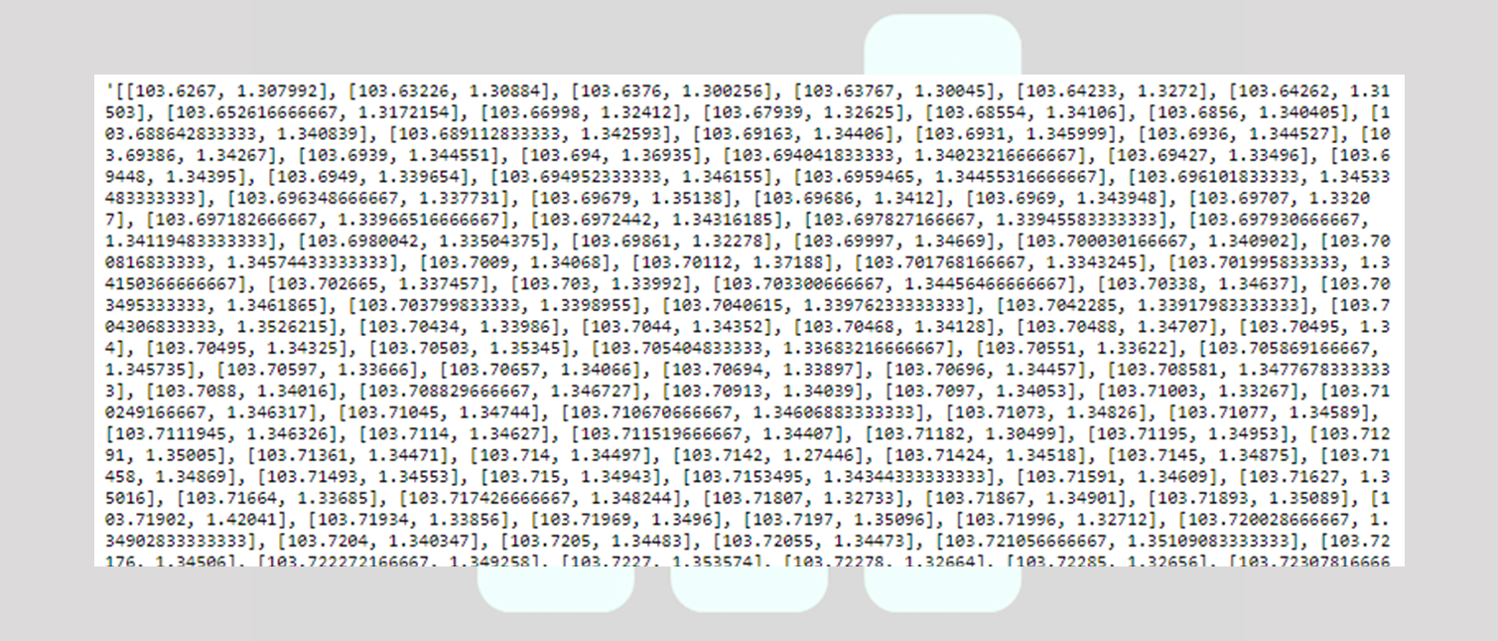

This is what happens when you look at the first row's 'geometry.coordinates'.

In [ ]:
# Step 3: Take a look at the first row's geometry coordinates
df['geometry.coordinates'][0]

### Step 4: Convert string representation of list to an actual list (10 minutes)
Wait a minute, something's wrong. If your eyes are sharp, you would have noticed that the lists are not really lists - they're strings! 

That's because when you read the CSV using pandas, pandas can't automatically parse the lists to become lists. 

You'll have to find a library and a function to do that, and <strong>apply</strong> this function to the string list in every single row. This process will take a bit of time (7-10 mins). 

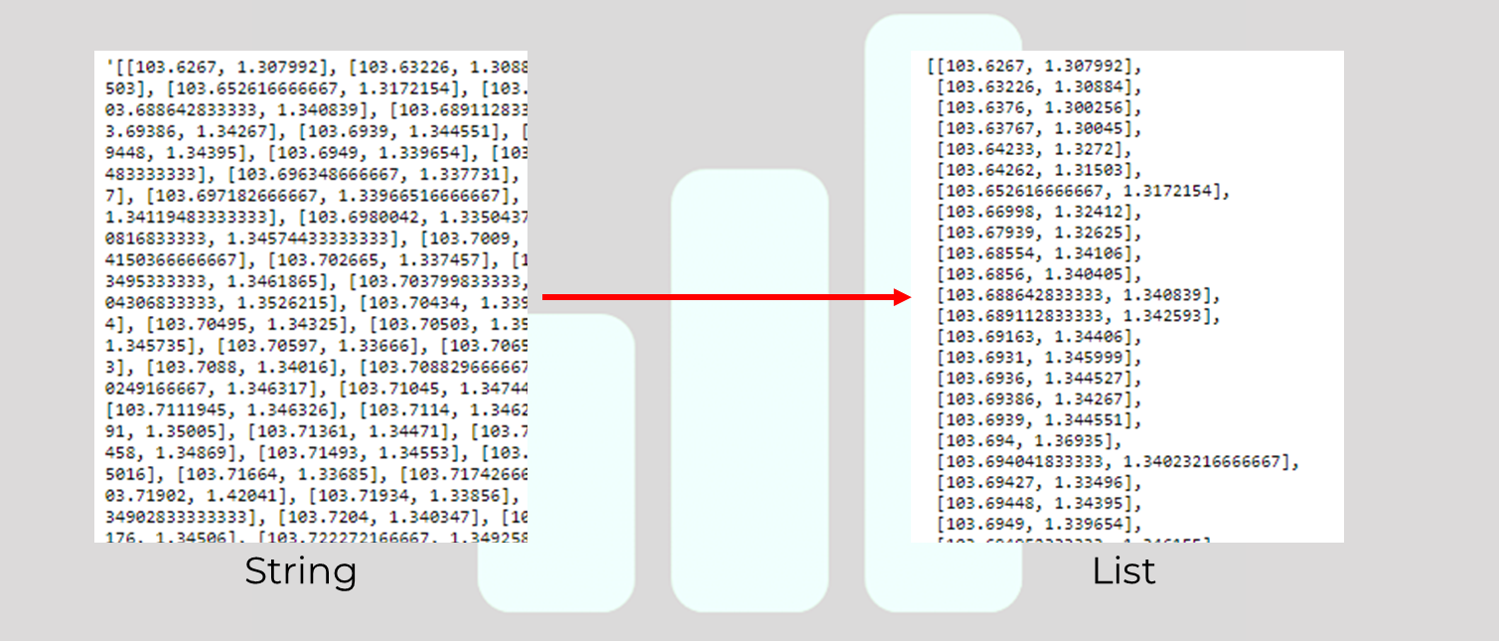

<strong>Hint: Google "convert string list into list python"</strong>

<strong>Hint 2: Google "use function on every row pandas"</strong>

In [3]:
# Step 4: Turn the values in 'geometry.coordinates' column into actual lists
import ast
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=16)

fn = lambda x: ast.literal_eval(x)
coords = df['geometry.coordinates'].parallel_apply(fn)
coords.shape, len(coords[0]), len(coords[0][0])

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


((8641,), 5887, 2)

### Step 5: Sort the coordinates into nine sectors
Now that we've successfully converted the string into lists, we can now loop through them.

Why, you ask? The reason for needing to loop through them is so that we can ascertain where the taxis are generally during a particular period of time. 

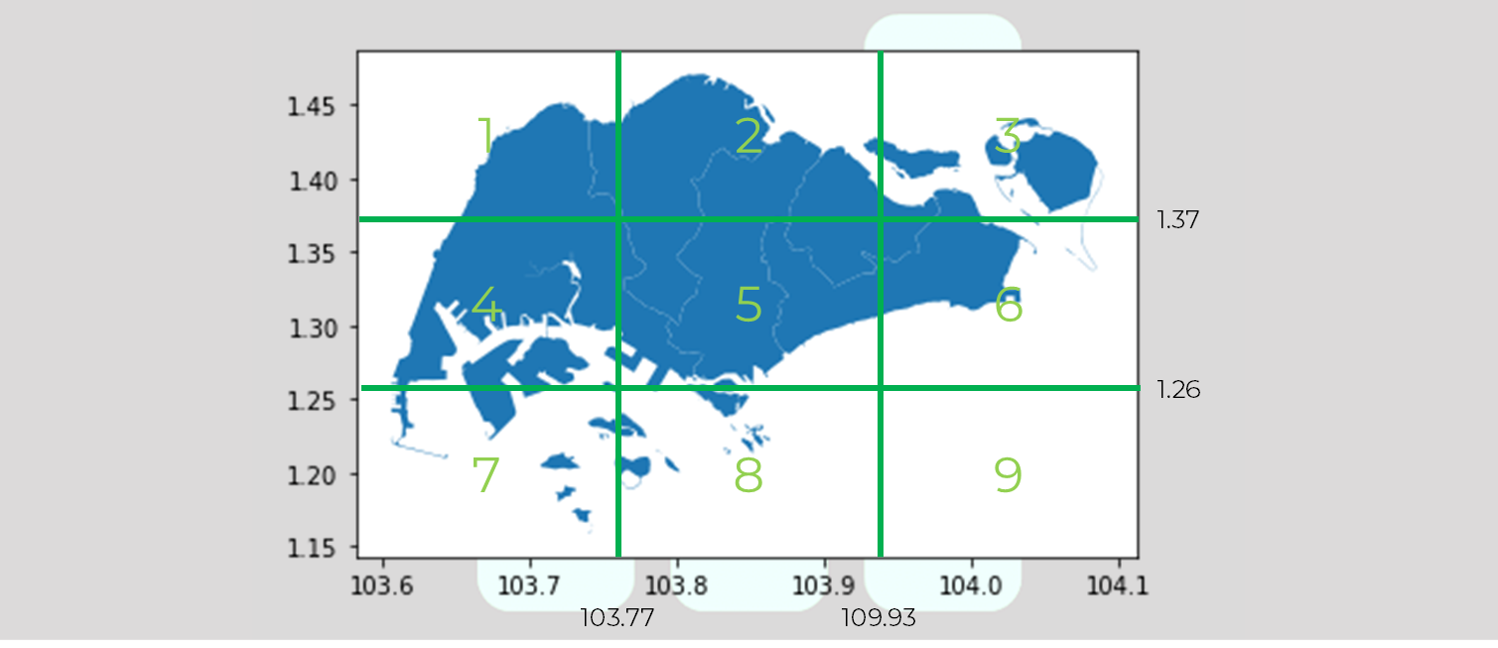

We will be dividing Singapore into nine parts, based on its longtitude and latitude. We can slice more, but for the sake of simplicity we'll be using nine parts first. 

A few things to take note of:
1. Left limit - 103.6
2. Right limit - 104.1
3. Upper limit - 1.48
4. Lower limit - 1.15

Use the numbers at the edge of the map as boundaries when you sort the coordinates.

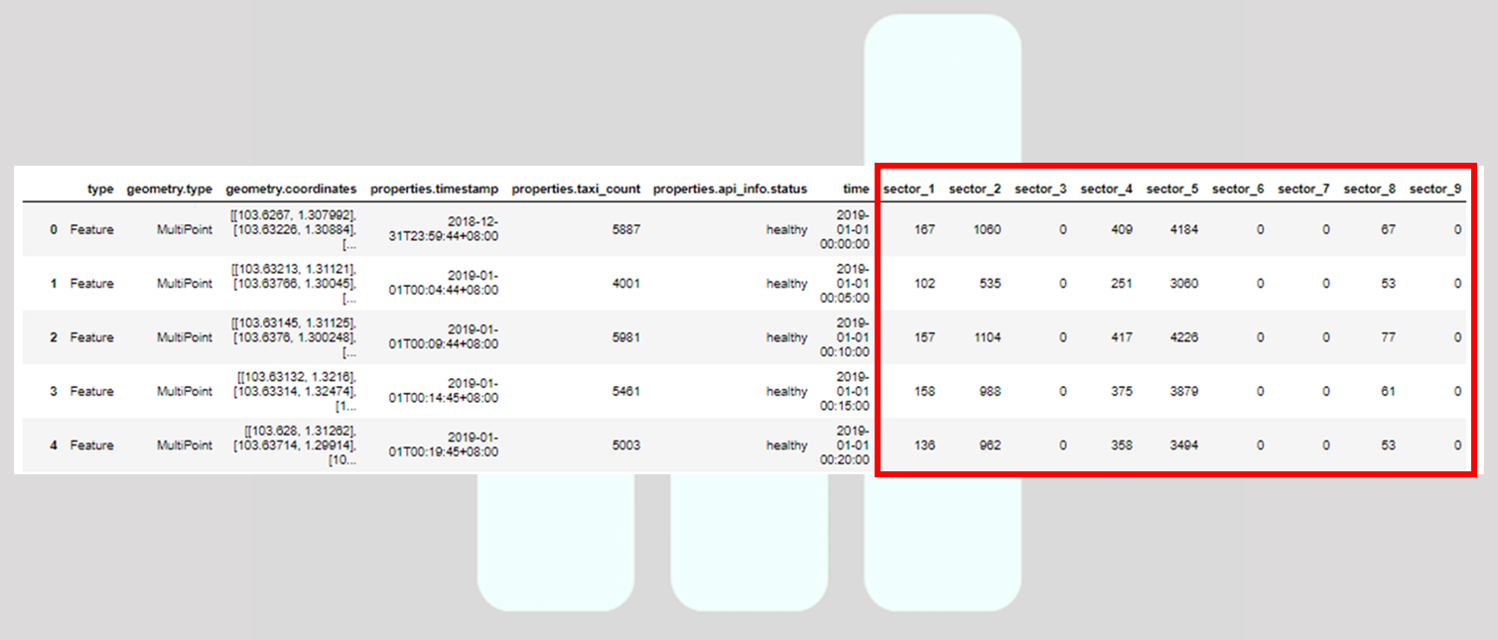

Make sure your DataFrame has new columns that reflect the number of taxis available in different sectors throughout a day.

<strong>Hint: Use inequalities signs, e.g., >= and <, and the "and" operator to sort your coordinates</strong>

In [4]:
import numpy as np

# Step 5: Sort the coordinates into the nine sectors
sectors = [[] for _ in range(9)]

for coord_list in coords:
    if len(coord_list) == 0:
        for i in range(len(sectors)):
            sectors[i].append(0)
        continue
    
    coord_arr = np.array(coord_list)
    
    cond = (coord_arr[:, 0] <= 103.77) & (coord_arr[:, 1] >= 1.37)
    sectors[0].append(np.count_nonzero(cond))
    cond = (103.77 < coord_arr[:, 0]) & (coord_arr[:, 0] <= 103.93) & (coord_arr[:, 1] >= 1.37)
    sectors[1].append(np.count_nonzero(cond))
    cond = (coord_arr[:, 0] > 103.93) & (coord_arr[:, 1] >= 1.37)
    sectors[2].append(np.count_nonzero(cond))
    cond = (coord_arr[:, 0] <= 103.77) & (1.26 <= coord_arr[:, 1]) & (coord_arr[:, 1] < 1.37)
    sectors[3].append(np.count_nonzero(cond))
    cond = (103.77 < coord_arr[:, 0]) & (coord_arr[:, 0] <= 103.93) & (1.26 <= coord_arr[:, 1]) & (coord_arr[:, 1] < 1.37)
    sectors[4].append(np.count_nonzero(cond))
    cond = (coord_arr[:, 0] > 103.93) & (1.26 <= coord_arr[:, 1]) & (coord_arr[:, 1] < 1.37)
    sectors[5].append(np.count_nonzero(cond))
    cond = (coord_arr[:, 0] <= 103.77) & (coord_arr[:, 1] < 1.26)
    sectors[6].append(np.count_nonzero(cond))
    cond = (103.77 < coord_arr[:, 0]) & (coord_arr[:, 0] <= 103.93) & (coord_arr[:, 1] < 1.26)
    sectors[7].append(np.count_nonzero(cond))
    cond = (coord_arr[:, 0] > 103.93) & (coord_arr[:, 1] < 1.26)
    sectors[8].append(np.count_nonzero(cond))

for i, sector in enumerate(sectors):
    df[f'sector_count{i}'] = sector

In [ ]:
# [Use this if you're really stuck] Step 5: Sort the coordinates into the nine sectors
# declare nine empty lists

# start a for loop to loop through the list of coordinates in geometry.coordinates column

    # initialize nine variables with 0 to keep count of the available taxis

    # use another for loop to loop through the coordinate pairs in the list of coordinates

        # if the first half of the coordinates is less or equals than 103.77 and the second half is equals to or more than 1.37

            # increment the count for sector 1 by 1

        # else if the first half of the coordinates is less than 103.77 and the second half is equals to or more than 1.26 and is less than 1.37

            # increment the count for sector 4 by 1

        # keep going until you're done with all nine sectors
    
    # append the counts of the free taxis in each in the nine lists

# once all of the rows have been looped through, create new columns using the lists that you've created

### Step 6: Turn the strings in 'time' column into a DataTime object
Next, we will get additional information from the "time", i.e. dayofweek, minute, hour. 

Currently, the values in the 'time' column are still strings so we will have to convert the values into to a DateTime object.

<strong>Hint: Google "convert DataFrame column type from string to datetime</strong>

In [5]:
# Step 6: convert the strings in "time" column into DateTime object
df['time'] = pd.to_datetime(df['time'])
df

,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status,time,sector_count0,sector_count1,sector_count2,sector_count3,sector_count4,sector_count5,sector_count6,sector_count7,sector_count8
0,Feature,MultiPoint,"[[103.6267, 1.307992], [103.63226, 1.30884], [...",2018-12-31T23:59:44+08:00,5887,healthy,2019-01-01 00:00:00,167,979,81,409,3506,678,0,67,0
1,Feature,MultiPoint,"[[103.63213, 1.31121], [103.63766, 1.30045], [...",2019-01-01T00:04:44+08:00,4001,healthy,2019-01-01 00:05:00,102,496,39,251,2589,471,0,53,0
2,Feature,MultiPoint,"[[103.63145, 1.31125], [103.6376, 1.300248], [...",2019-01-01T00:09:44+08:00,5981,healthy,2019-01-01 00:10:00,157,1035,69,417,3546,680,0,77,0
3,Feature,MultiPoint,"[[103.63132, 1.3216], [103.63314, 1.32474], [1...",2019-01-01T00:14:45+08:00,5461,healthy,2019-01-01 00:15:00,158,920,68,375,3225,654,0,61,0
4,Feature,MultiPoint,"[[103.628, 1.31262], [103.63714, 1.29914], [10...",2019-01-01T00:19:45+08:00,5003,healthy,2019-01-01 00:20:00,136,900,62,358,2898,596,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,Feature,MultiPoint,"[[103.62689, 1.31369], [103.62953, 1.30178], [...",2019-01-30T23:39:40+08:00,5782,healthy,2019-01-30 23:40:00,233,1301,79,585,2591,986,0,7,0
8637,Feature,MultiPoint,"[[103.615898833333, 1.27034783333333], [103.62...",2019-01-30T23:44:40+08:00,5843,healthy,2019-01-30 23:45:00,220,1314,78,612,2645,961,0,13,0
8638,Feature,MultiPoint,"[[103.624481, 1.30293333333333], [103.62871, 1...",2019-01-30T23:49:40+08:00,5825,healthy,2019-01-30 23:50:00,214,1269,80,605,2684,960,0,13,0
8639,Feature,MultiPoint,"[[103.62935, 1.2973], [103.62964, 1.29373], [1...",2019-01-30T23:54:40+08:00,5783,healthy,2019-01-30 23:55:00,211,1228,88,590,2702,950,1,13,0


### Step 7:Get 'dayofweek', 'minute', and 'hour from 'time' column
Now that the column is now a proper DateTime object, we can now extract more information.

We will be creating new three new columns with:
1. day_of_week - day of the week, i.e. 0 (Monday) - 6 (Sunday)
2. minute - minute in day
3. hour - hour in day

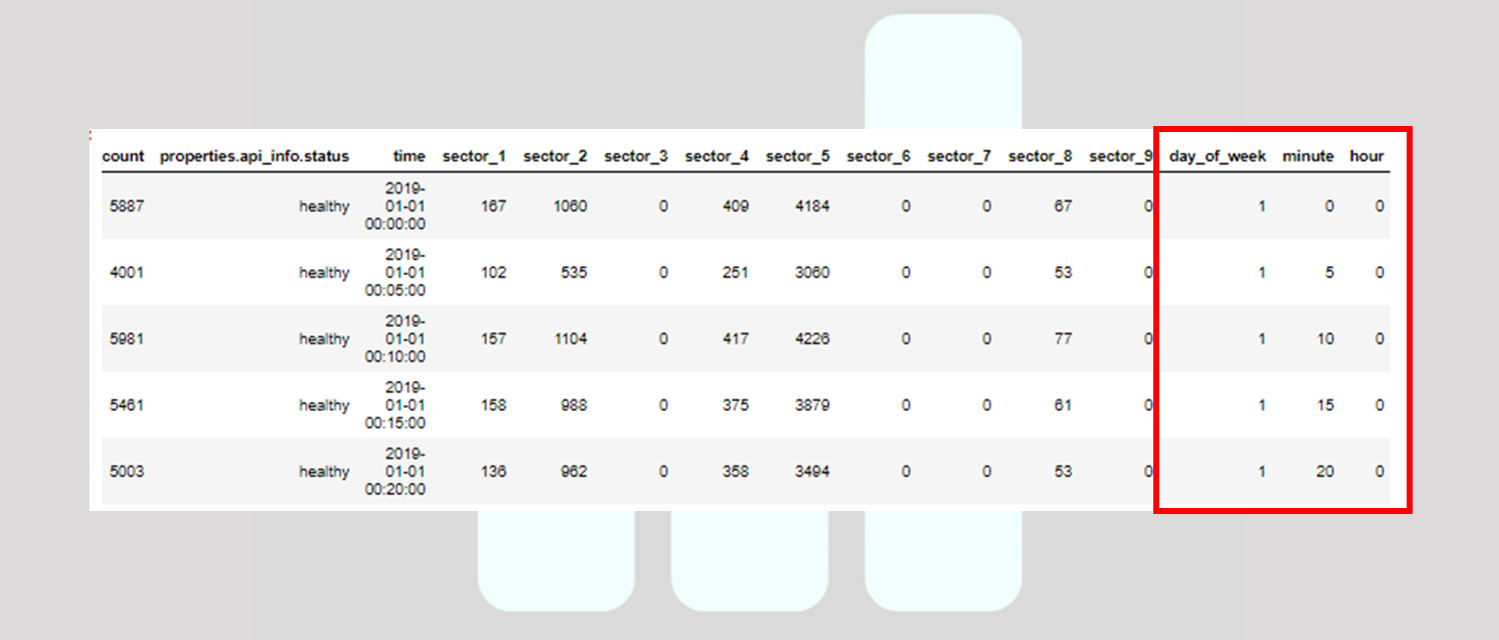

We can only extract data for the following columns because we've collected only one month's worth of data. Of course, you can always revisit this after you're done with Part IV.

<strong>Hint: Google "get column datetime attributes"</strong>

In [6]:
# Step 7: Get dayofweek, minute, hour from 'time' column
df['day_of_week'] = pd.DatetimeIndex(df['time']).day_of_week
df['hour'] = pd.DatetimeIndex(df['time']).hour
df['minute'] = pd.DatetimeIndex(df['time']).minute

### Step 8: Get the only parts you need
As we have more and more columns, it's important to take the only ones you need. We can ditch the raw coordinates, and keep only the numbers of the taxis available in the nine sectors that we've defined. 

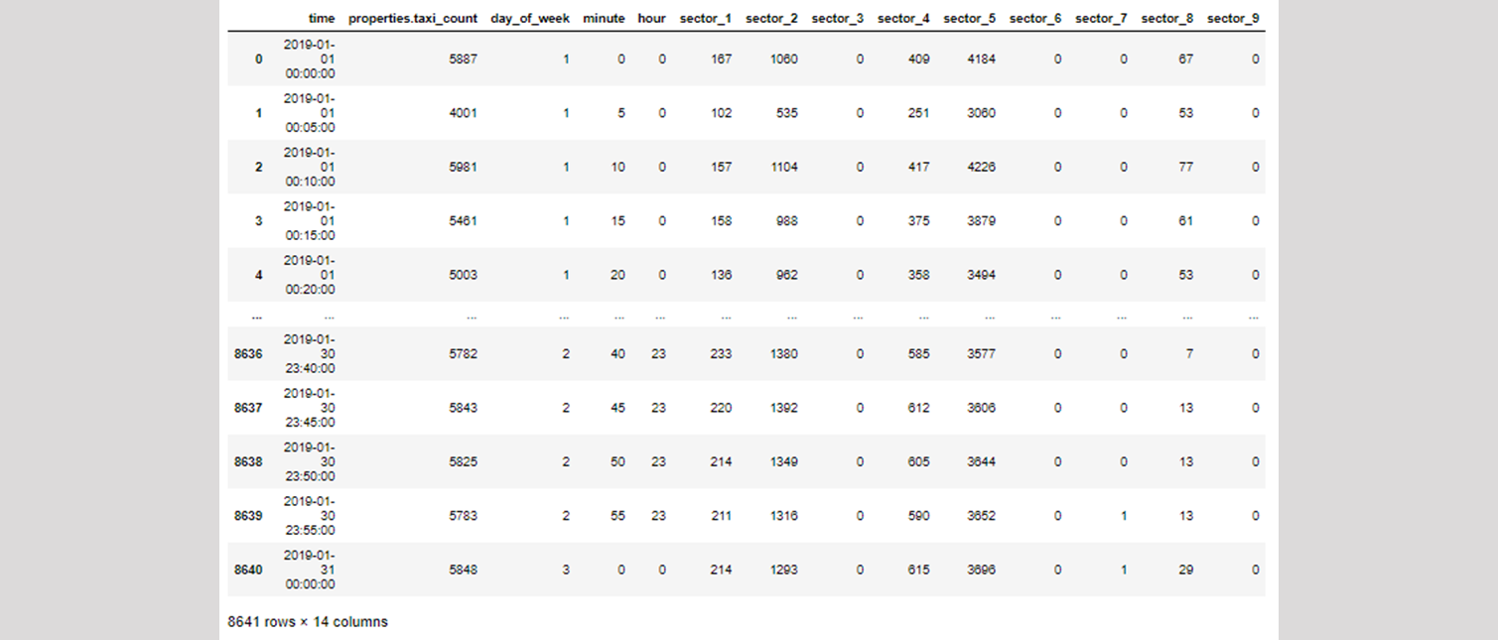

You should only have the following at the end <strong>(in this order)</strong>:
1. the time at which the API was called
2. taxi count
3. day_of_week
4. minute
5. hour
6. taxis available for sectors 1-9

You should also have 8,641 rows and 14 columns after you're done. Depending on how you defined the inequality signs, you should have slightly different numbers but it generally should be of the same scale. 

<strong>Hint: Google "select multiple columns pandas" if you need help</strong>

In [12]:
# Step 8: Select only the necessary columns for the DataFrame
out_df = df.loc[:, 
    ['time', 
     'properties.taxi_count',
     'day_of_week', 'minute', 'hour', 
     'sector_count0', 'sector_count1', 'sector_count2', 
     'sector_count3', 'sector_count4', 'sector_count5', 
     'sector_count6', 'sector_count7', 'sector_count8']]

### Step 9: Export your DataFrame as CSV
Well done! You're finally done for this Part. It was tough but you did it. Time to export your DataFrame as a CSV for Part III. 

In [14]:
# Step 9: Export the DataFrame from Step 8 as CSV
out_df.to_csv('taxi_availability_cleaned.csv', index=False)